<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/10Vietnamesedishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/10vndishes/'

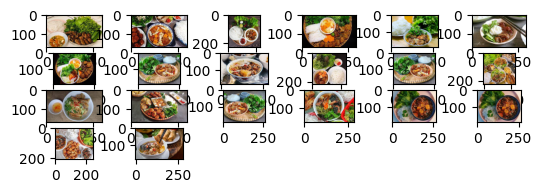

In [6]:
for i in range(20):
  plt.subplot(10,6,i+1)
  filename1 = folder + 'buncha'+ str(i+1)+'.jpg'
  img1 = plt.imread(filename1)
  plt.imshow(img1)
plt.show()

In [7]:
from os import listdir 
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/10vndishes/'
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('cafe'):
    output = 1 
  if file.startswith('chacalavong '):
    output = 2
  if file.startswith('che'):
    output = 3
  if file.startswith('nem'):
    output = 4
  if file.startswith('banhmi'):
    output = 5
  if file.startswith('banhxeo'):
    output = 6
  if file.startswith('comtam'):
    output = 7
  if file.startswith('pho'):
    output = 8
  img = load_img(folder + file,target_size=(200,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/monan_photos.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/monan_labels.npy',labels)

(180, 200, 200, 3) (180,)


In [8]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/monan_photos.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/monan_labels.npy')
print(x_train.shape)
print(y_train.shape)

(180, 200, 200, 3)
(180,)


In [9]:
x_train = x_train.astype('float32')/255

In [10]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

y_train = to_categorical(y_train,10)
model = Sequential()

# tich chap 32 lan
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 64 lan
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 128 lan
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train, batch_size=64,epochs=50,verbose=1)
model.save('Monan.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [11]:
model.save('/content/drive/MyDrive/Colab Notebooks/traning_model/Monan.h5/')

1/1 [==============================] - 0s 234ms/step


'Bánh Xèo '

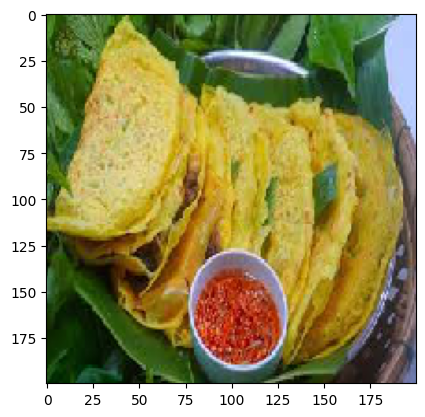

In [12]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'cafe',2:'Chả Cá Lá Vọng', 
       3:'Chè', 4:'Nem ',
       5:'Bánh Mì ', 6:'Bánh Xèo ',
       7:'Cơm Tấm ', 8:'Phở '} 
img = load_img("/content/drive/MyDrive/10vndishes/banhxeo17.jpg",target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,200,200,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 29ms/step


'Chè'

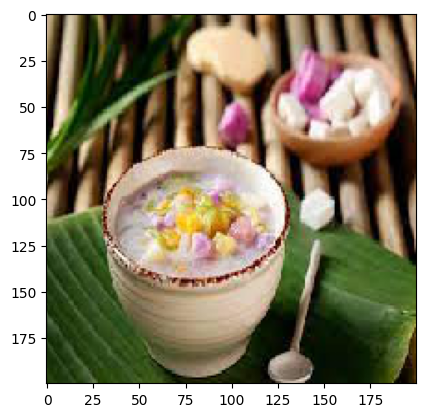

In [15]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'cafe',2:'Chả Cá Lá Vọng', 
       3:'Chè', 4:'Nem ',
       5:'Bánh Mì ', 6:'Bánh Xèo ',
       7:'Cơm Tấm ', 8:'Phở '} 
img = load_img("/content/drive/MyDrive/10vndishes/che2.jpg",target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,200,200,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 25ms/step


'Phở '

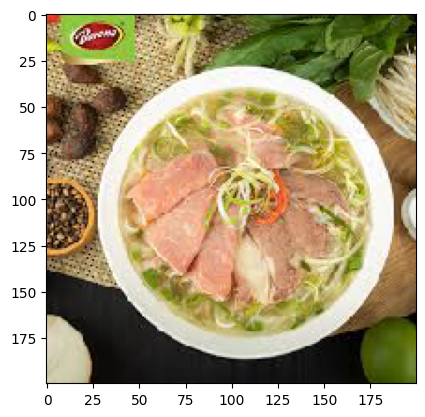

In [16]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'cafe',2:'Chả Cá Lá Vọng', 
       3:'Chè', 4:'Nem ',
       5:'Bánh Mì ', 6:'Bánh Xèo ',
       7:'Cơm Tấm ', 8:'Phở '} 
img = load_img("/content/drive/MyDrive/10vndishes/pho17.jpg",target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,200,200,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]